In [18]:
import folium
m = folium.Map(location=[45,-122],zoom_start=10,tiles='Stamen Terrain')#Stamen Toner
# m.save("test.html") # 맵저장 
folium.Marker([45,-122],popup='Mauntain',tooltip='o.k').add_to(m)
folium.Marker([45.05,-122],popup='Mauntain',tooltip='o.k',icon=folium.Icon(color='red',icon='info-sign')).add_to(m)
folium.Circle([45.1,-122],radius=50,color='yellow',fill_color='yellow').add_to(m)
m




In [1]:
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import googlemaps

crime_anal_raw=pd.read_csv("02. crime_in_Seoul_include_gu_name.csv",encoding='utf-8')
crime_anal_raw=pd.read_csv("02. crime_in_Seoul_include_gu_name.csv",encoding='utf-8',index_col=0)
crime_anal = pd.pivot_table(crim_anal_raw,index='구별',aggfunc=np.sum)

crime_anal
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

con_list=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
for column in con_list:
    crime_anal.loc[crime_anal[column] >100 ,column]=100



crime_anal.rename(columns={'강간 발생':'강간','강도 발생':'강도','살인 발생':'살인','절도 발생':'절도','폭력 발생':'폭력'},inplace=True)
col = ['강간','강도','살인','절도','폭력']
x = crime_anal[col].values


min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm=pd.DataFrame(x_scaled, columns=col,index = crime_anal.index)


col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm
crime_anal_norm.head()


result_CCTV = pd.read_csv("01. CCTV_result.csv",encoding='utf-8',index_col='구별')
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]


col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

# col =['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
# crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
# crime_anal_norm


import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')



sns.pairplot(crime_anal_norm,vars=['강도','살인','폭력'],kind='reg',size=3)
plt.show()
sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"], y_vars=['살인','강도'], kind='reg',size=3)
plt.show()

# sns.pairplot(crime_anal_norm,x_vars=["인구수","CCTV"], y_vars=['살인검거율','폭력검거율'], kind='reg',size=3)
# plt.show()


# target_col=['강간','강도','살인','절도','폭력','범죄']

# crime_anal_norm['범죄'] = crime_anal['범죄']/5



NameError: name 'crim_anal_raw' is not defined

In [50]:
import folium
import pandas as pd
map_osm = folium.Map(location=[45.5236,-122.6750])
map_osm

stamen = folium.Map(location=[45.5236,-122.6750],zoom_start=13)
stamen

stamen = folium.Map(location=[45.5236,-122.6750],files='StamenToner',zoom_start=13)
stamen

map_2 = folium.Map(location=[45.5236,-122.6750],files='StamenToner',zoom_start=13)

folium.Marker([45.5236,-122.6699],popup='The Waterfront').add_to(map_2)
folium.CircleMarker([45.5215,-122.6661],radius=50,popup='Laurelhurst park',color='#3186cc',fill_color='#3186cc',).add_to(map_2)
map_2

state_unemployement = '02. folium_US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployement)
state_data.head()
state_geo = "02. folium_us-states.json"
map = folium.Map(location=[40,-98],zoom_start=4)
map.choropleth(geo_data=state_geo,data=state_data,columns=['State','Unemployment'], key_on='feature.id',fill_color='YlGn',legend_name='Unemployment Rate(%)')
map

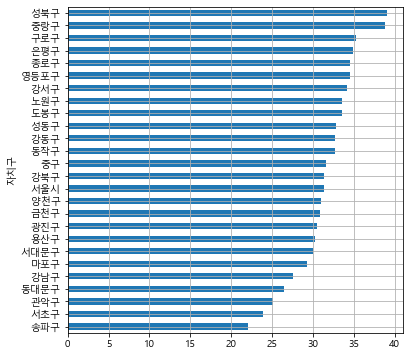

In [183]:
df=pd.read_excel("서울시 비만도 통계.xlsx",header=2)
df

del df['체질량지수(BMI)(평균)']
del df['저체중(BMI<18.5)']
del df['정상(18.5≤BMI＜25)']
del df['기간']

df

df.set_index('자치구',inplace=True)
df
df.rename(columns={'비만(BMI≥25)':'비만율'},inplace=True)

df

df['비만율'].sort_values().plot(kind = 'barh',grid=True,figsize=(6,6))
plt.show()


import json

geo_path ="05. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding='utf-8'))

map = folium.Map(location=[37.5502,126.982],zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, data = df['비만율'],columns=['자치구','비만율'],key_on='feature.id',fill_color="PuRd")
map

In [216]:
import json
import folium
import numpy as np
import pandas as pd

geo_str=json.load(open("02. skorea_municipalities_geo_simple.json",encoding='utf-8'))

df2=pd.read_excel("서울시 비만도 통계.xlsx",header=2,index_col=1)

df3 = df2.iloc[1:,1:]

col = ['비만','저체중','정상','평균']

df3.columns = col

from sklearn import preprocessing

x= df3[col].values

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))

df4 = pd.DataFrame(x_scaled,columns = col,index = df3.index)
# df4.head()
# df4.index

map = folium.Map(location=[37.5502,126.982],zoom_start=11)
map.choropleth(geo_data = geo_str, 
data = df4['평균'], columns=[df4.index,df4['평균']] ,key_on='feature.id',fill_color="PuRd")

map